In [ ]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
x_train.shape

(50000, 32, 32, 3)

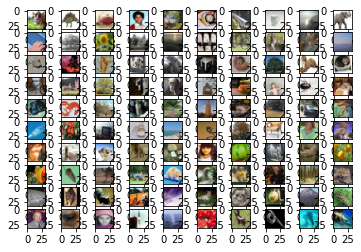

In [ ]:
import matplotlib.pyplot as plt 
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(x_train[i])
plt.show()


In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)


In [ ]:
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from keras.models import Sequential
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(100,activation='softmax'))


In [ ]:
from tensorflow.keras.optimizers import SGD
opt=SGD(lr=0.01,momentum=0.9)
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=250,batch_size=64,validation_data=(x_test,y_test),verbose=1)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/250
782/782 [==============================] - 7s 9ms/step - loss: 4.1693 - accuracy: 0.0644 - val_loss: 3.7215 - val_accuracy: 0.1312
Epoch 2/250
782/782 [==============================] - 7s 8ms/step - loss: 3.4126 - accuracy: 0.1787 - val_loss: 3.1560 - val_accuracy: 0.2285
Epoch 3/250
782/782 [==============================] - 6s 8ms/step - loss: 2.9850 - accuracy: 0.2620 - val_loss: 2.8481 - val_accuracy: 0.2879
Epoch 4/250
782/782 [==============================] - 7s 8ms/step - loss: 2.6793 - accuracy: 0.3201 - val_loss: 2.7075 - val_accuracy: 0.3219
Epoch 5/250
782/782 [==============================] - 6s 8ms/step - loss: 2.4125 - accuracy: 0.3758 - val_loss: 2.5281 - val_accuracy: 0.3563
Epoch 6/250
782/782 [==============================] - 6s 8ms/step - loss: 2.1867 - accuracy: 0.4223 - val_loss: 2.5405 - val_accuracy: 0.3625
Epoch 7/250
782/782 [==============================] - 6s 8ms/step - loss: 2.0054 - accuracy: 0.4629 - val_loss: 2.4761 - val_accuracy: 0.3862

In [ ]:
model.save('cifar100_19146118.h5')

In [ ]:
from keras.saving.save import load_model
model5 = load_model('cifar100_19146118.h5')